# Praca domowa nr 1 - EDA
Joanna Kajka, 10.03.2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
data = pd.read_csv('students.csv')

## Analiza rozmiaru danych

In [4]:
data.shape

(1044, 34)

 * Ramka danych posiada 1044 wierszy i 34 kolumny

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

* Ramka nie zawiera żadnych braków danych
* Zawiera dane typu int oraz object w stosunku 16:18

In [134]:
pd.set_option('display.max_columns', None)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math


## Znaczenie danych
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

##### These grades are related with the course subject, Math or Portuguese:

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

## Analiza danych numerycznych

In [30]:
cont = data.select_dtypes(np.number)
col = cont.columns

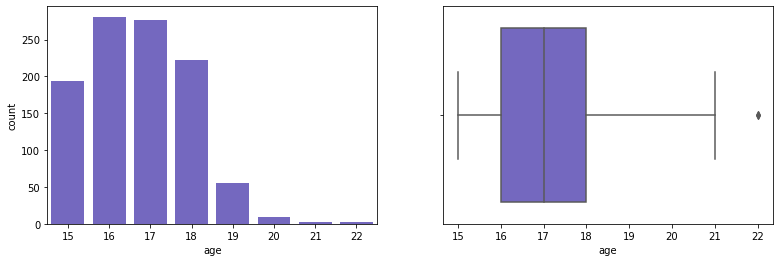

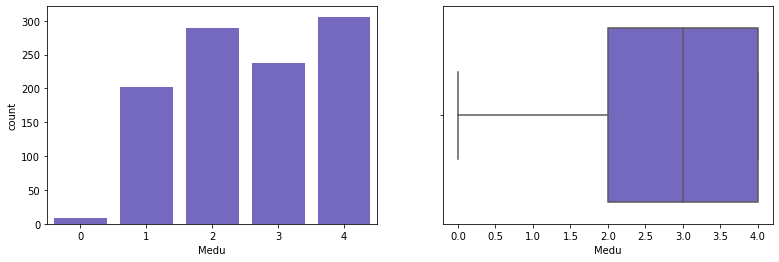

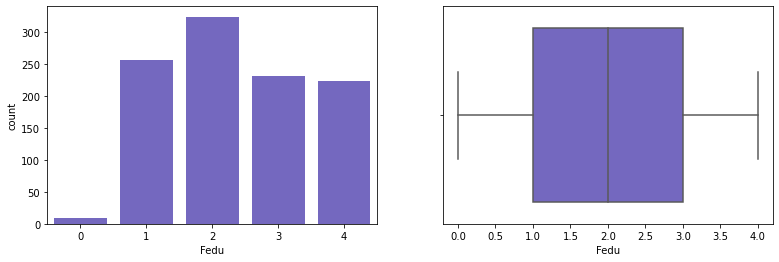

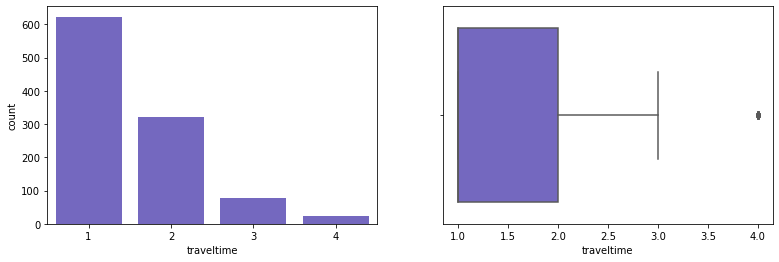

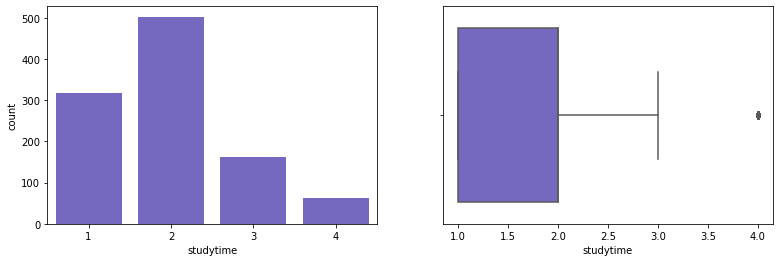

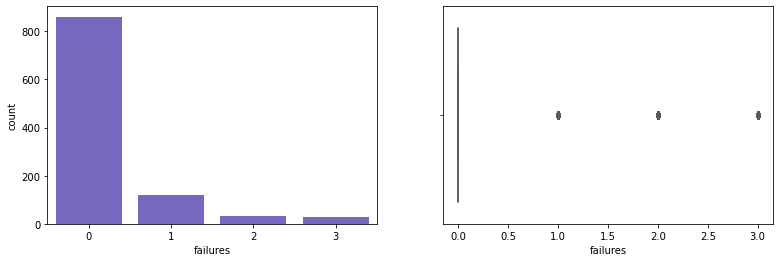

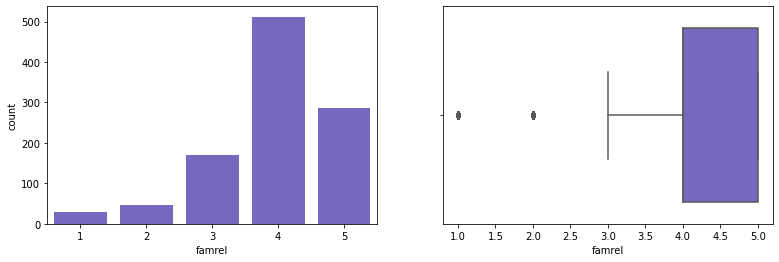

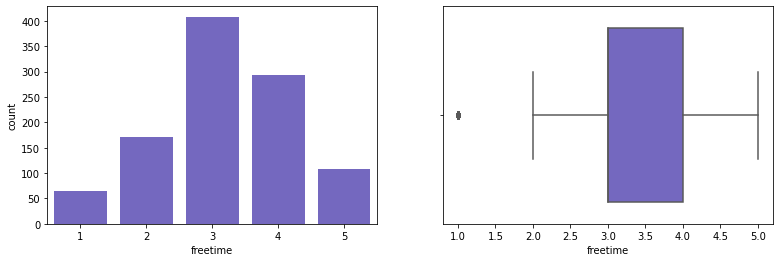

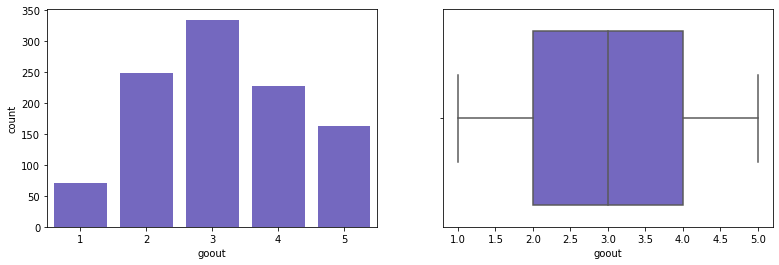

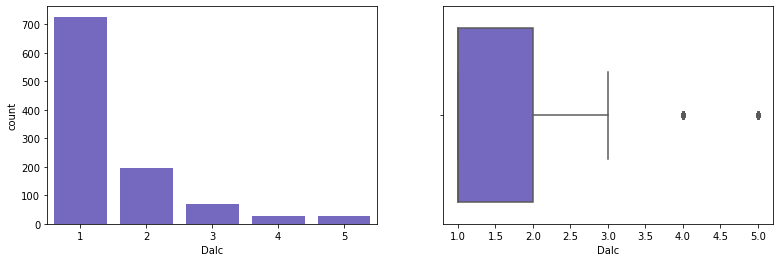

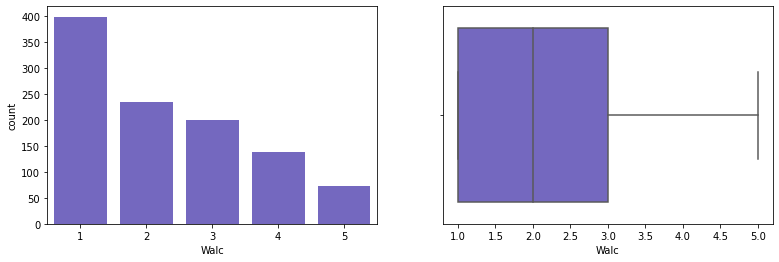

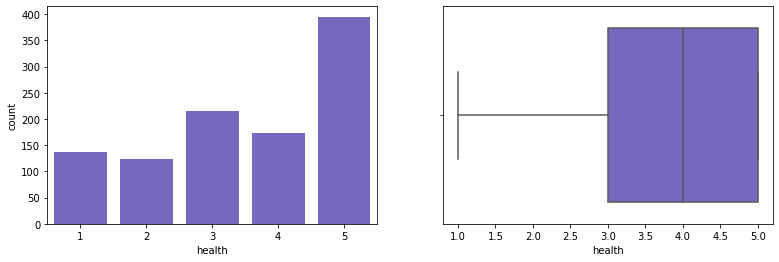

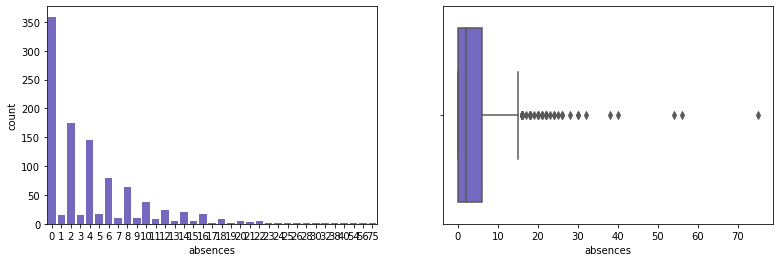

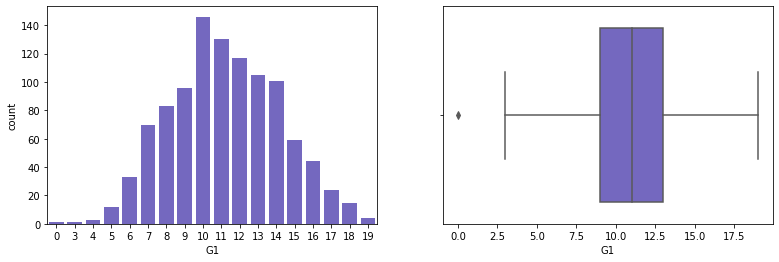

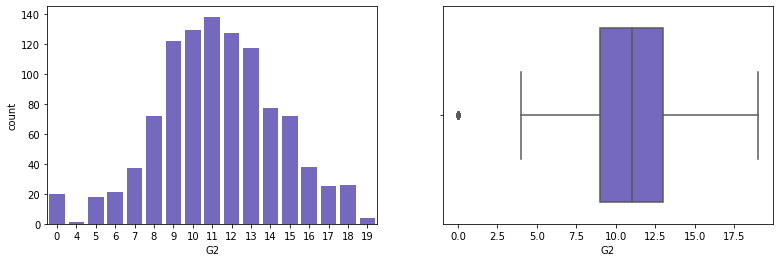

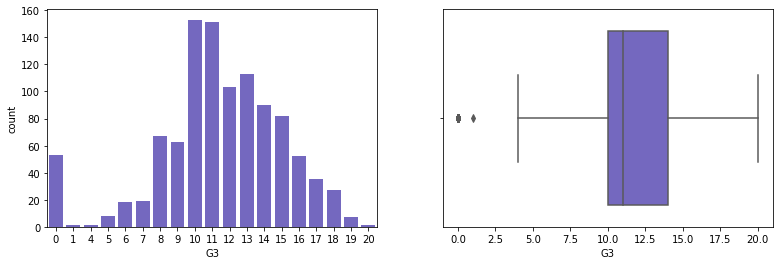

In [63]:
for column in col:
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(13, 4)
    sns.countplot(x = column, data=cont, ax=ax[0],color = 'slateblue')
    sns.boxplot(x = column, data=cont, ax=ax[1], color = 'slateblue')
    plt.show()

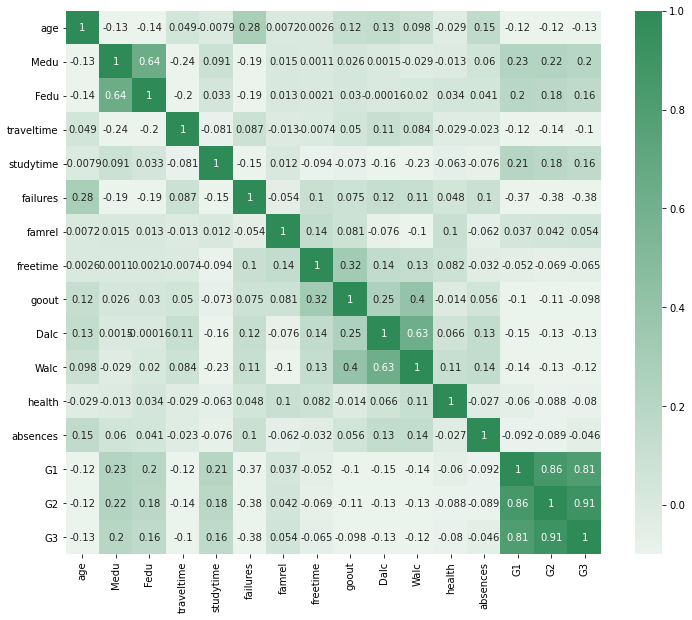

In [106]:
plt.figure(figsize=(12,10))
sns.heatmap(cont.corr(), annot=True, cmap = sns.light_palette("seagreen", as_cmap=True), vmin=-0.1, vmax=1)
plt.show()

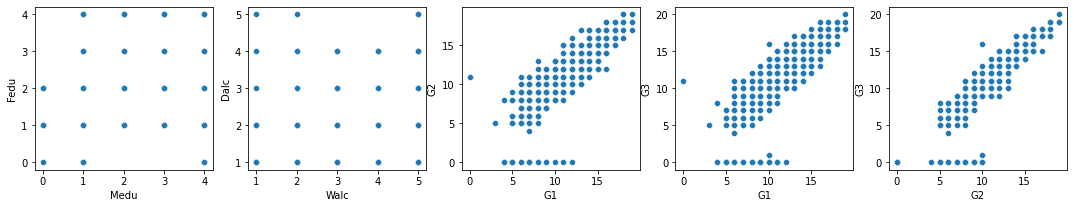

In [61]:
fig, ax = plt.subplots(1,5,  figsize=(18.5, 3))
sns.scatterplot(data=cont, x='Medu', y="Fedu", palette=['stateblue'], ax=ax[0])
sns.scatterplot(data=cont, x='Walc', y="Dalc", palette=['stateblue'], ax=ax[1])
sns.scatterplot(data=cont, x='G1', y="G2", palette=['stateblue'], ax=ax[2])
sns.scatterplot(data=cont, x='G1', y="G3", palette=['stateblue'], ax=ax[3])
sns.scatterplot(data=cont, x='G2', y="G3", palette=['stateblue'], ax=ax[4])
plt.show()

* Tylko w przypadku kolumn *G1*, *G2* oraz *G3* mamy do czynienia ze zmiennymi ciągłymi dlatego przyjrzymy im się uważniej

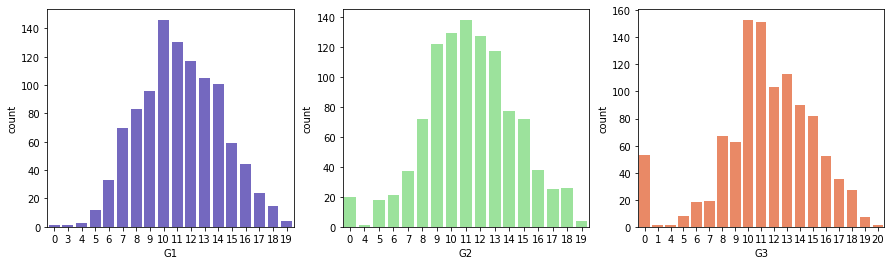

In [103]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 4)
sns.countplot(x = 'G1', data=cont, ax=ax[0],color = 'slateblue')
sns.countplot(x = 'G2', data=cont, ax=ax[1],color = 'lightgreen')
sns.countplot(x = 'G3', data=cont, ax=ax[2],color = 'coral')
plt.show()

* Widzimy, że rozład ocen w każdej grupie jest zbliżony do rozkładu normalnego, w związku z tym wyżej przedtawione zmienne są ze sobą silnie skorelowane

## Analiza danych kategorycznych

In [90]:
obj = data.select_dtypes(object)
col1 = obj.columns

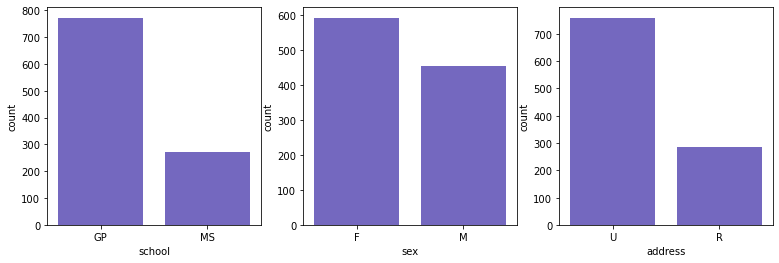

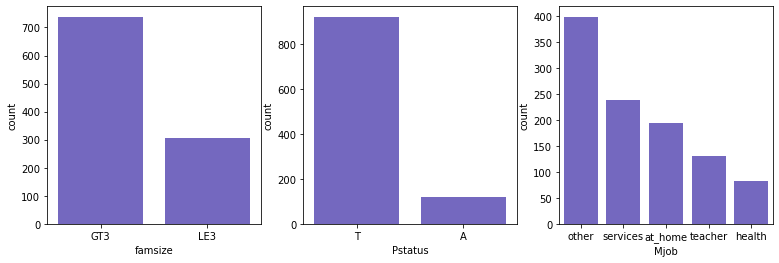

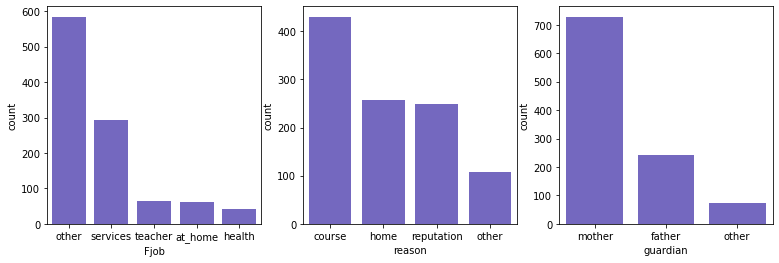

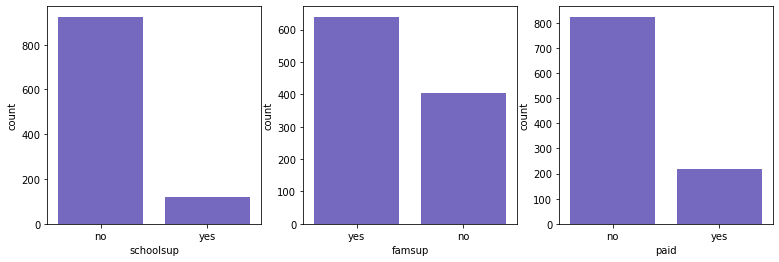

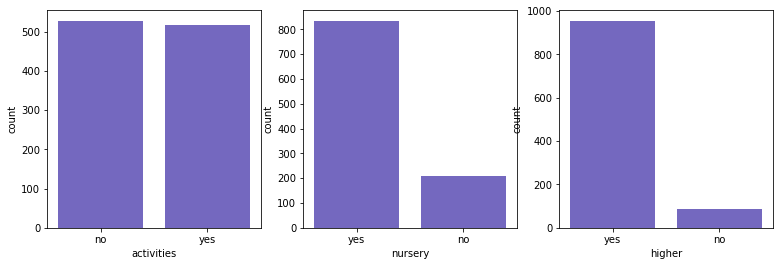

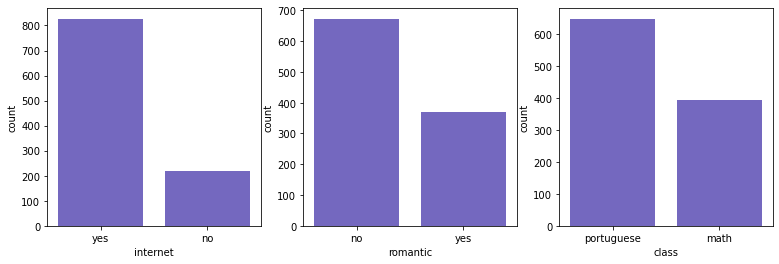

In [98]:
for i in range(6):
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(13, 4)
    df1 = obj[col1[i*3]].value_counts()
    df2 = obj[col1[i*3+1]].value_counts()
    df3 = obj[col1[i*3+2]].value_counts()
    sns.countplot(data = obj, x = col1[i*3], color = 'slateblue', order = df1.index, ax =ax[0])
    sns.countplot(data = obj, x = col1[i*3+1], color = 'slateblue', order = df2.index, ax=ax[1])
    sns.countplot(data = obj, x = col1[i*3+2], color = 'slateblue', order = df3.index, ax=ax[2])
    plt.show()

## Zmiana zmiennych kategorycznych na numeryczne w określony sposób
- no, MS, M, R, LE3, A, father, portuguese -> **0**
- yes, GP, F, U, GT3, T, mother, services, course, math -> **1**
- at_home, home -> **2**
- teacher, reputation -> **3**
- health -> **4**
- other -> **5**

In [125]:
new_data = data
columns = ['schoolsup', 'famsup', 'paid' ,'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in columns:
    new_data[col] = new_data[col].replace(['yes','no'],[1, 0])
new_data['class'] = new_data['class'].replace(['portuguese','math'],[0,1])
new_data['reason'] = new_data['reason'].replace(['home', 'course', 'reputation', 'other'],[2,1,3,5])
new_data['guardian'] = new_data['guardian'].replace(['mother', 'father', 'other'],[1,0,5])
new_data['famsize'] = new_data['famsize'].replace(['GT3', 'LE3'],[1,0])
new_data['Pstatus'] = new_data['Pstatus'].replace(['T', 'A'],[1,0])
new_data['school'] = new_data['school'].replace(['GP', 'MS'],[1,0])
new_data['sex'] = new_data['sex'].replace(['F', 'M'],[1,0])
new_data['address'] = new_data['address'].replace(['U', 'R'],[1,0])
for col in ['Fjob', 'Mjob']:
    new_data[col] = new_data[col].replace(['services','at_home', 'health', 'other', 'teacher'],[1,2,3,4,5])

In [126]:
new_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,1,1,18,1,1,0,4,4,2,5,1,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1
1,1,1,17,1,1,1,1,1,2,4,1,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,1,1,15,1,0,1,1,1,2,4,5,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,1,1,4,2,3,1,2,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,1,1,3,3,4,4,2,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,1,19,0,1,1,2,3,1,4,1,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,0
1040,0,1,18,1,0,1,3,1,5,1,1,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0
1041,0,1,18,1,1,1,1,1,4,4,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0
1042,0,0,17,1,0,1,3,1,1,1,1,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0


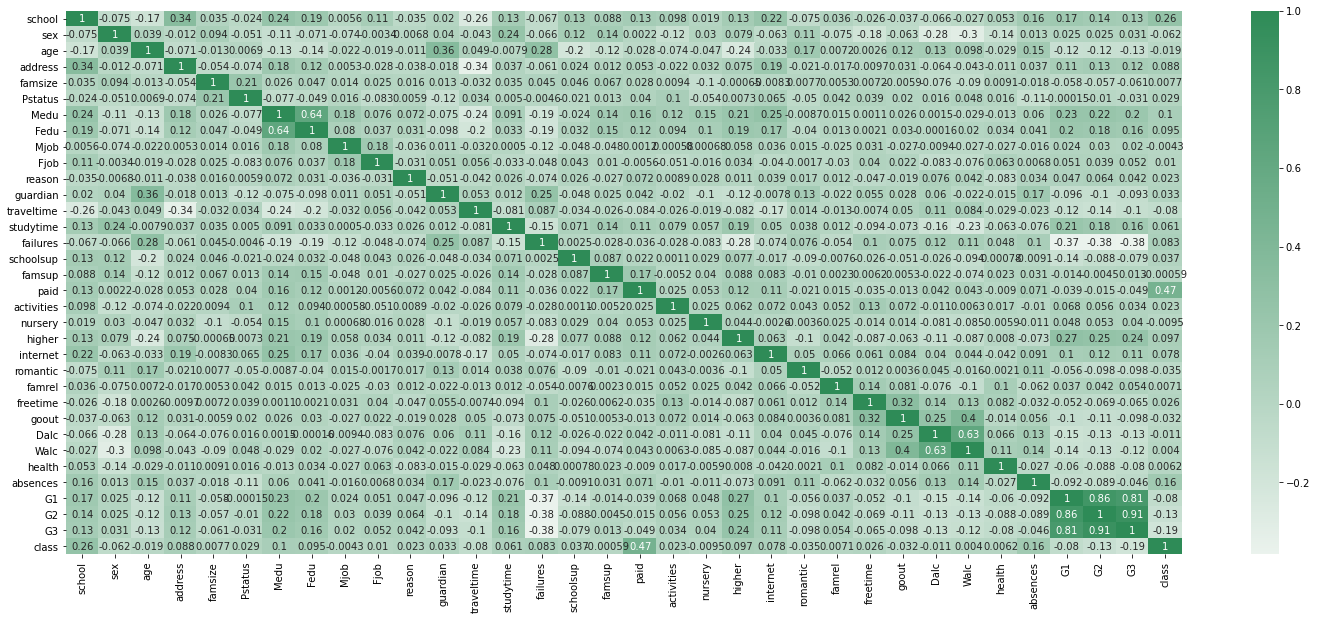

In [127]:
plt.figure(figsize=(25,10))
sns.heatmap(new_data.corr(), annot=True, cmap = sns.light_palette("seagreen", as_cmap=True))
plt.show()

* Pomijając zmienne z kolumn *G1*, *G2*, *G3* możemy zauważyć częściową zalężność innych zmiennych, jednak nie jest ona na tyle wysoka, jak w przypadku *G1*, *G2*, *G3*

### Porównanie innych ciekawych zmiennych

<AxesSubplot:title={'center':'Reason'}, ylabel='school'>

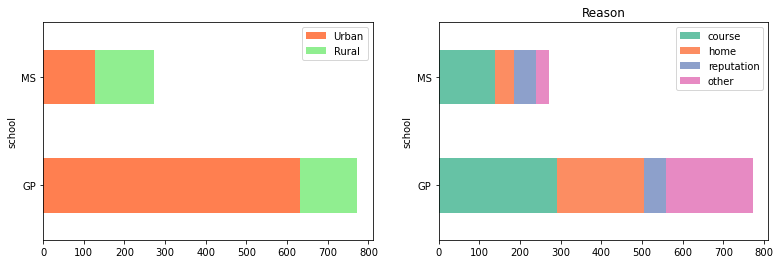

In [201]:
data_grouped = data[['school', 'address']].groupby(['school', 'address']).size()
data_grouped1 = data[['school', 'reason']].groupby(['school', 'reason']).size()
df = pd.DataFrame([['GP', 631, 141], ['MS', 128,144]],
                  columns=['school', 'Urban', 'Rural'])
df1 = pd.DataFrame([['GP', 291, 213,54,214], ['MS', 139,45,54,34]],
                  columns=['school', 'course', 'home', 'reputation','other'])
fig, ax = plt.subplots(1,2)
fig.set_size_inches(13, 4)
df.plot(x='school', kind='barh', stacked=True,
       color = ['coral','lightgreen'],ax=ax[0])
df1.plot(x='school', kind='barh', stacked=True,
       color = sns.color_palette("Set2"),ax=ax[1], title='Reason')

* Widzimy, że szkoła *GP* jest bardziej oblegana przez uczniów. Nie jest to jednak spowodowane kryterium *reputation* jak można było mylnie przypuszczać. Głownym czynniekiem jest odległość od domu oraz dostępne kursy. Możemy z tego wnioskować, że szkoła *GP* znajduje się w centrum miasta, gdzie mieszka więcej osób.

<AxesSubplot:title={'center':'Do extra paid classes exists in selected school'}, ylabel='school'>

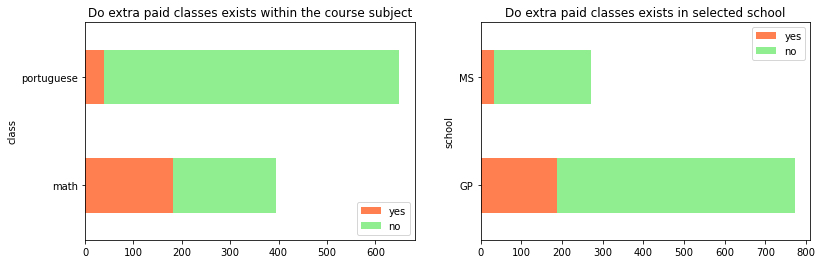

In [204]:
data_grouped = data[['paid', 'class']].groupby(['paid', 'class']).size()
data_grouped1 = data[['school', 'paid']].groupby(['school', 'paid']).size()
df = pd.DataFrame([['math', 181, 214], ['portuguese', 39,610]],
                  columns=['class', 'yes', 'no'])
df1 = pd.DataFrame([['GP', 187,585], ['MS', 33,239]],
                  columns=['school', 'yes', 'no'])
fig, ax = plt.subplots(1,2)
fig.set_size_inches(13, 4)
df.plot(x='class', kind='barh', stacked=True, title = 'Do extra paid classes exists within the course subject',
       color = ['coral','lightgreen'], ax=ax[0])
df1.plot(x='school', kind='barh', stacked=True, title = 'Do extra paid classes exists in selected school',
       color = ['coral','lightgreen'], ax=ax[1])

* Jak widać z powyższego wykresu w szkole *GP* znajduje się więcej kursów, w tym więcej kursów płatych. W przypadku kursów płatnych, widać że jest ich zdecydowanie więcej z matematyki, mimo większej ogólnej liczby kursów z języka portugalskiego.

<Figure size 2160x504 with 0 Axes>

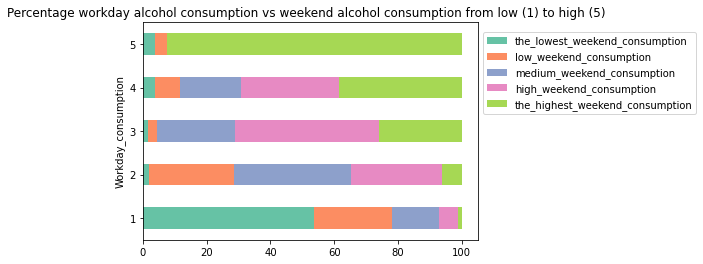

In [192]:
data_grouped = data[['Dalc', 'Walc']].groupby(['Dalc', 'Walc']).size()
df = pd.DataFrame([[1, 391/7.27,178/7.27,106/7.27,43/7.27,9/7.27], [2, 4/1.96,52/1.96,72/1.96,56/1.96,12/1.96], [3,1/0.69,2/0.69,17/0.69,31/0.69,18/0.69], [4,1/0.26,2/0.26,5/0.26,8/0.26,10/0.26], [5,1/0.26,1/0.26,0,0,24/0.26]],
                  columns=['Workday_consumption', 'the_lowest_weekend_consumption', 'low_weekend_consumption', 'medium_weekend_consumption', 'high_weekend_consumption', 'the_highest_weekend_consumption'])
plt.figure(figsize=(30,7))
df.plot(x='Workday_consumption', kind='barh', stacked=True, title = 'Percentage workday alcohol consumption vs weekend alcohol consumption from low (1) to high (5)  ',
       color = sns.color_palette("Set2"))
plt.legend(bbox_to_anchor=(1, 0.98))

* Jesli chodzi o spożycie alkoholu, widać silną zależność ilości spożytego alkoholu w weekend od ilości spożytej w ciągu tygodnia. 

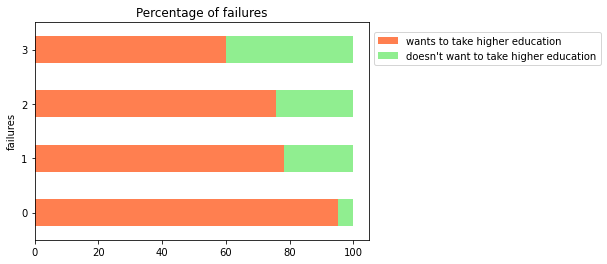

In [193]:
data_grouped = data[['failures', 'higher']].groupby(['failures','higher']).size()
df = pd.DataFrame([[0, 818/8.61,43/8.61], [1, 94/1.2, 26/1.2], [2,25/0.33,8/0.33], [3,18/0.3,12/0.3]],
                  columns=['failures', 'wants to take higher education', "doesn't want to take higher education"])
df.plot(x='failures', kind='barh', stacked=True, title = 'Percentage of failures',
       color = ['coral','lightgreen'])
plt.legend(bbox_to_anchor=(1, 0.98))

* Osoby chcące podjąć wyższą edukacje odniosły procentowo mniej porażek. Co więcej wraz ze wzrostem porażek zmniejsza się procent osób chcących podjąć dalszą naukę.